In [1]:
import sys, os, copy, re, random
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as tck
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1)
sns.set_style("whitegrid")
#palette = list(mcolors.TABLEAU_COLORS.keys())
#palette.extend(['salmon', 'teal','yellowgreen'])
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")
palette = sns.color_palette(as_cmap=True)

In [2]:
# Read data:
df = list(pd.read_excel('plotting_data.xlsx', sheet_name=None).values())[0]
df['Cell_vol'] = df['Mean cell size'] * (2**df['Log2 cells']) * 1e-9
df.head(3)

,Rescue,Inhibitor,Cell line,Log2 cells,Prlfr,Mean cell size,Mean cell size norm,Cell_vol
0,Vehicle,Vehicle,H1299,19.465829,1.090409,5281,1.000000,3.823972
1,Guanine,Vehicle,H1299,18.751073,0.852157,7008,1.327021,3.091930
2,Adenine,Vehicle,H1299,19.484044,1.096480,5323,1.007953,3.903356


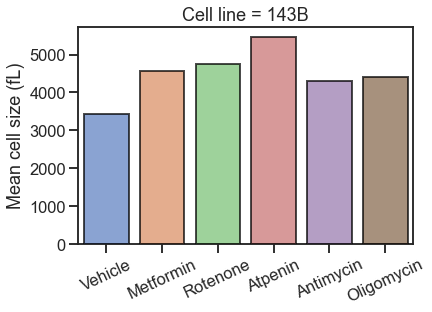

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
cell_line_mask = (df['Cell line'] == '143B') & (df['Rescue'] == 'Vehicle')
order = ['Vehicle', 'Metformin', 'Rotenone', 'Atpenin', 'Antimycin', 'Oligomycin']

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size', zorder=20, linewidth=2, edgecolor='black', alpha=0.7, order=order)
g1.set_xticklabels(g1.get_xticklabels(), rotation=25)
ax1.set_title('Cell line = 143B');
ax1.set_ylabel('Mean cell size (fL)');
ax1.set_xlabel('');
fig.savefig('cell_size_143B.pdf', bbox_inches='tight');

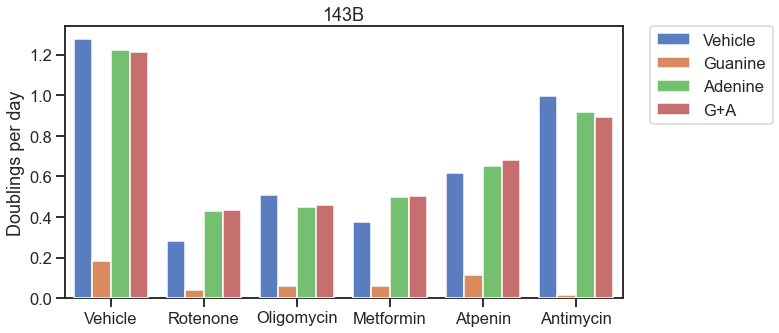

In [4]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == '143B'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Prlfr', hue='Rescue', zorder=20)
ax1.set_title('143B');
ax1.set_ylabel('Doublings per day');
ax1.set_xlabel('');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


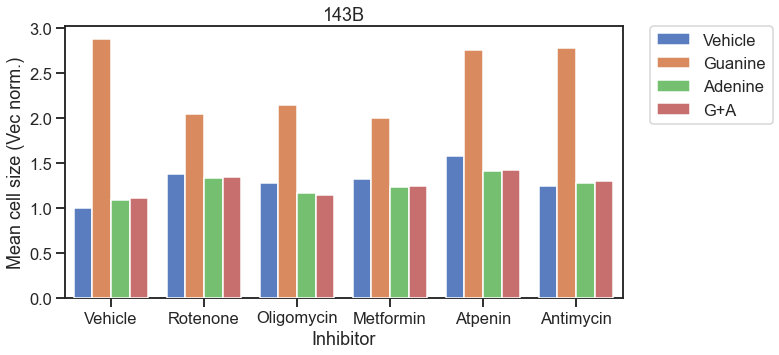

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == '143B'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size norm', hue='Rescue', zorder=20)
ax1.set_title('143B');
ax1.set_ylabel('Mean cell size (Vec norm.)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

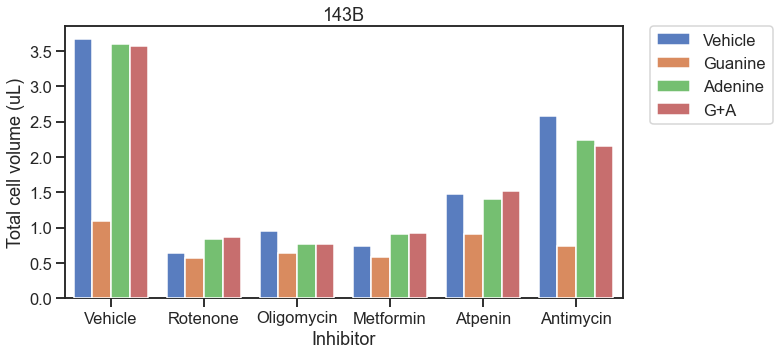

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == '143B'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Cell_vol', hue='Rescue', zorder=20)
ax1.set_title('143B');
ax1.set_ylabel('Total cell volume (uL)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

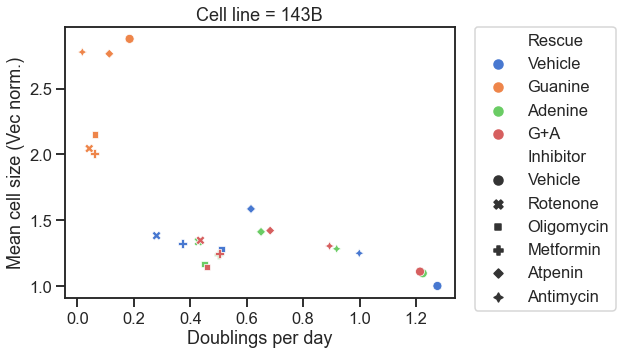

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
cell_line_mask = df['Cell line'] == '143B'

g1 = sns.scatterplot(ax=ax1, data=df[cell_line_mask], y='Mean cell size norm', x='Prlfr', hue='Rescue', style='Inhibitor', zorder=20)
ax1.set_title('Cell line = 143B');
ax1.set_ylabel('Mean cell size (Vec norm.)');
ax1.set_xlabel('Doublings per day');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('cell_size_Prlfr_143B.pdf', bbox_inches='tight');

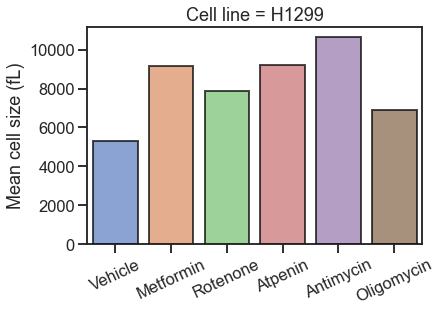

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
cell_line_mask = (df['Cell line'] == 'H1299') & (df['Rescue'] == 'Vehicle')
order = ['Vehicle', 'Metformin', 'Rotenone', 'Atpenin', 'Antimycin', 'Oligomycin']

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size', zorder=20, linewidth=2, edgecolor='black', alpha=0.7, order=order)
g1.set_xticklabels(g1.get_xticklabels(), rotation=25)
ax1.set_title('Cell line = H1299');
ax1.set_ylabel('Mean cell size (fL)');
ax1.set_xlabel('');

fig.savefig('cell_size_H1299.pdf', bbox_inches='tight');

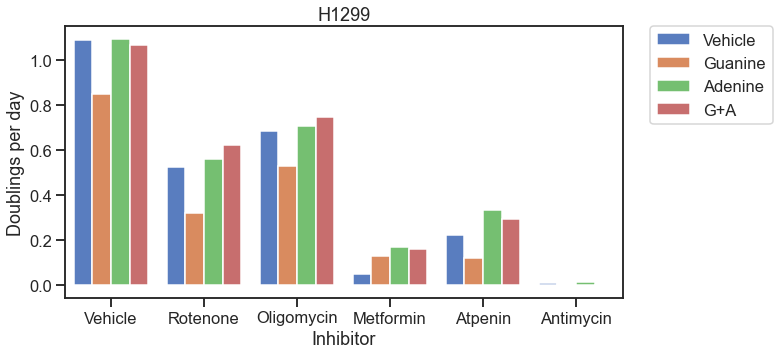

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == 'H1299'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Prlfr', hue='Rescue', zorder=20)
ax1.set_title('H1299');
ax1.set_ylabel('Doublings per day');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


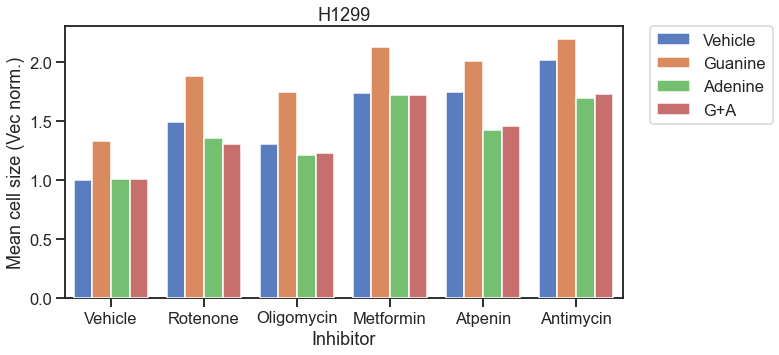

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == 'H1299'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size norm', hue='Rescue', zorder=20)
ax1.set_title('H1299');
ax1.set_ylabel('Mean cell size (Vec norm.)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

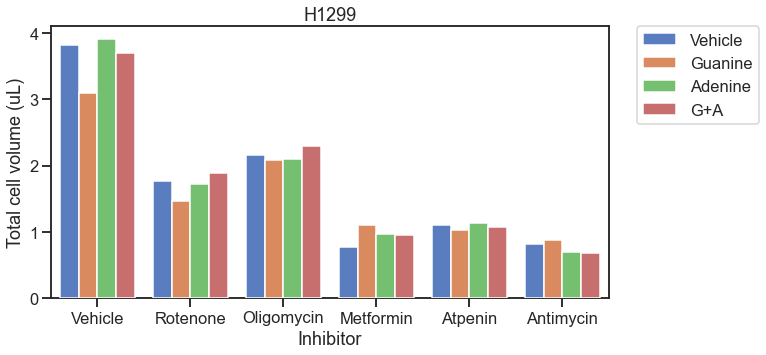

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == 'H1299'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Cell_vol', hue='Rescue', zorder=20)
ax1.set_title('H1299');
ax1.set_ylabel('Total cell volume (uL)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

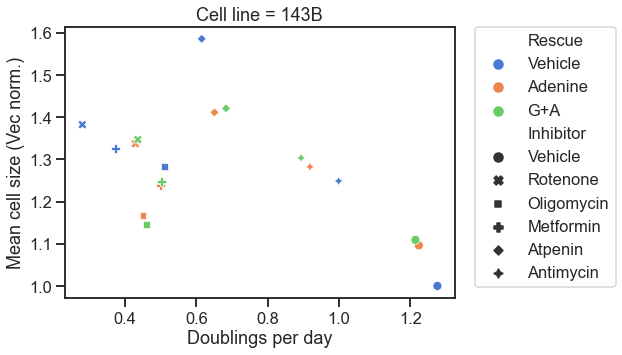

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
cell_line_mask = (df['Cell line'] == '143B')  & (df['Rescue'].isin(['Vehicle', 'Adenine', 'G+A']))

g1 = sns.scatterplot(ax=ax1, data=df[cell_line_mask], y='Mean cell size norm', x='Prlfr', hue='Rescue', style='Inhibitor', zorder=20)
ax1.set_title('Cell line = 143B');
ax1.set_ylabel('Mean cell size (Vec norm.)');
ax1.set_xlabel('Doublings per day');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('cell_size_Prlfr_143B.pdf', bbox_inches='tight');

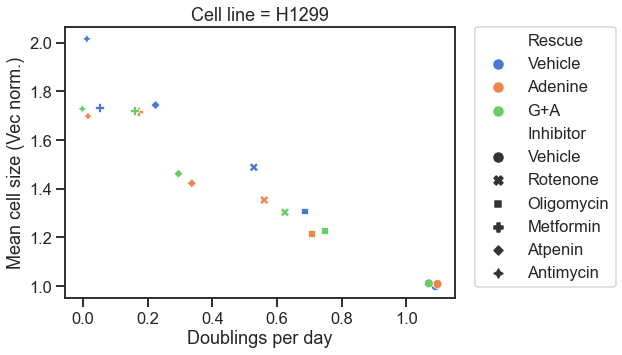

In [15]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
cell_line_mask = (df['Cell line'] == 'H1299') & (df['Rescue'].isin(['Vehicle', 'Adenine', 'G+A']))

g1 = sns.scatterplot(ax=ax1, data=df[cell_line_mask], y='Mean cell size norm', x='Prlfr', hue='Rescue', style='Inhibitor', zorder=20)
ax1.set_title('Cell line = H1299');
ax1.set_ylabel('Mean cell size (Vec norm.)');
ax1.set_xlabel('Doublings per day');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('cell_size_Prlfr_H1299.pdf', bbox_inches='tight');